In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.layers  import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

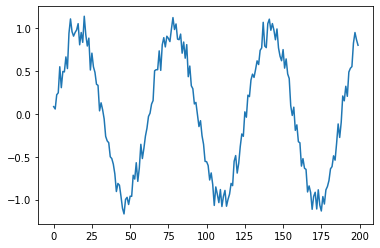

In [115]:
series = np.sin(0.1*np.arange(200)) + 0.1*np.random.randn(200)
plt.plot(series)

In [0]:
T = 10 # Time step length 
D = 1 
X = []
Y = []

for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T,1)
Y = np.array(Y)
N = len(X)

In [117]:
i = Input(shape=(T,1))
x = SimpleRNN(5,activation='sigmoid')(i)
x = Dense(1)(x)

model = Model(i,x)
model.compile(loss='mse',optimizer=Adam(lr=.1))
model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 10, 1)]           0         
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, 5)                 35        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [118]:
r = model.fit(X[:-N//2],Y[:-N//2],epochs=80,validation_data=(X[-N//2:],Y[-N//2:]))

Epoch 1/80
3/3 [==============================] - 0s 54ms/step - loss: 0.8939 - val_loss: 0.3430
Epoch 2/80
3/3 [==============================] - 0s 14ms/step - loss: 0.4665 - val_loss: 0.3001
Epoch 3/80
3/3 [==============================] - 0s 16ms/step - loss: 0.2821 - val_loss: 0.1274
Epoch 4/80
3/3 [==============================] - 0s 13ms/step - loss: 0.1006 - val_loss: 0.1352
Epoch 5/80
3/3 [==============================] - 0s 16ms/step - loss: 0.1167 - val_loss: 0.1195
Epoch 6/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0939 - val_loss: 0.0403
Epoch 7/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0327 - val_loss: 0.0339
Epoch 8/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0378 - val_loss: 0.0744
Epoch 9/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0549 - val_loss: 0.0617
Epoch 10/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0388 - val_loss: 0.0339
Epoch 11/80
3/3 [============

In [0]:
validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2


In [0]:
last_x = X[i]

while(len(validation_predictions)<len(validation_target)):
  p = model.predict(X[i].reshape(1,-1,1))[0,0]
  i +=1
  validation_predictions.append(p)
  last_x = np.roll(last_x,-1)
  last_x[-1] = p

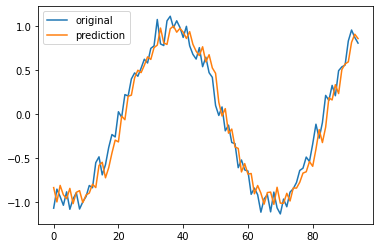

In [121]:
plt.plot(validation_target,label='original')
plt.plot(validation_predictions,label='prediction')
plt.legend()